# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [130]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city2 = "London"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" +\
#query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
city_temp=[]

#cities2=['London','Chicago','dallas'] test the code before calling 600+ cities
print("Beginning Data Retrieval\n-----------------------------")
rcd=0 #initial values for record and sets
sets=1

for city in cities:
    rcd+=1
    print(f'Processing record {rcd} of set {sets} | {city}')
    
    if (rcd==50):
        rcd=0
        sets+=1
    
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial" 
    try:
        jsonresponse=requests.get(url).json()
        city_temp.append({'City':city, 
                         'Lat': jsonresponse['coord']['lat'],
                         'Long': jsonresponse['coord']['lon'],
                         'Max Temp':jsonresponse['main']['temp_max'],
                         'Humidity':jsonresponse['main']['humidity'],
                         'Cloudiness':jsonresponse['clouds']['all'],
                         'Wind Speed':jsonresponse['wind']['speed'],
                         'Country': jsonresponse['sys']['country'],
                         'Date':jsonresponse['dt']})
    except:
        print('City not found.  Skipping...')
            

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | vaini
Processing record 2 of set 1 | xuanhua
Processing record 3 of set 1 | plainview
Processing record 4 of set 1 | kapaa
Processing record 5 of set 1 | busselton
Processing record 6 of set 1 | port alfred
Processing record 7 of set 1 | aberlour
City not found.  Skipping...
Processing record 8 of set 1 | ambulu
Processing record 9 of set 1 | carnarvon
Processing record 10 of set 1 | bengkulu
Processing record 11 of set 1 | punta arenas
Processing record 12 of set 1 | cape town
Processing record 13 of set 1 | tumannyy
City not found.  Skipping...
Processing record 14 of set 1 | hilo
Processing record 15 of set 1 | chuy
Processing record 16 of set 1 | yanan
City not found.  Skipping...
Processing record 17 of set 1 | kaitangata
Processing record 18 of set 1 | georgetown
Processing record 19 of set 1 | dikson
Processing record 20 of set 1 | beringovskiy
Processing record 21 of set 1 | brae
Processing re

Processing record 37 of set 4 | cidreira
Processing record 38 of set 4 | tokmak
Processing record 39 of set 4 | sindou
Processing record 40 of set 4 | toliary
City not found.  Skipping...
Processing record 41 of set 4 | juneau
Processing record 42 of set 4 | douentza
Processing record 43 of set 4 | zambezi
Processing record 44 of set 4 | mitsamiouli
Processing record 45 of set 4 | olafsvik
Processing record 46 of set 4 | antofagasta
Processing record 47 of set 4 | shimoda
Processing record 48 of set 4 | gushikawa
Processing record 49 of set 4 | umzimvubu
City not found.  Skipping...
Processing record 50 of set 4 | vanavara
Processing record 1 of set 5 | pangai
Processing record 2 of set 5 | miyako
Processing record 3 of set 5 | ginda
Processing record 4 of set 5 | yulara
Processing record 5 of set 5 | mahebourg
Processing record 6 of set 5 | maningrida
Processing record 7 of set 5 | majene
Processing record 8 of set 5 | tornio
Processing record 9 of set 5 | milkovo
Processing record 10

Processing record 26 of set 8 | vostok
Processing record 27 of set 8 | boyolangu
Processing record 28 of set 8 | saint-augustin
Processing record 29 of set 8 | eyl
Processing record 30 of set 8 | rock sound
Processing record 31 of set 8 | ouadda
Processing record 32 of set 8 | atikokan
Processing record 33 of set 8 | mouzakion
City not found.  Skipping...
Processing record 34 of set 8 | champoton
Processing record 35 of set 8 | puerto cabezas
Processing record 36 of set 8 | maragogi
Processing record 37 of set 8 | marawi
Processing record 38 of set 8 | sao joao da barra
Processing record 39 of set 8 | lensk
Processing record 40 of set 8 | konstantinovka
Processing record 41 of set 8 | sao gabriel da cachoeira
Processing record 42 of set 8 | puertollano
Processing record 43 of set 8 | devils lake
Processing record 44 of set 8 | sangar
Processing record 45 of set 8 | portland
Processing record 46 of set 8 | kitgum
Processing record 47 of set 8 | pindiga
Processing record 48 of set 8 | co

Processing record 11 of set 12 | mandalgovi
Processing record 12 of set 12 | souillac
Processing record 13 of set 12 | charters towers
Processing record 14 of set 12 | salinopolis
Processing record 15 of set 12 | naryan-mar
Processing record 16 of set 12 | luanda
Processing record 17 of set 12 | sicamous
Processing record 18 of set 12 | amuntai
Processing record 19 of set 12 | medyn
Processing record 20 of set 12 | bonthe
Processing record 21 of set 12 | forraskut
Processing record 22 of set 12 | linxia
Processing record 23 of set 12 | atar
Processing record 24 of set 12 | camopi
Processing record 25 of set 12 | nylstroom
City not found.  Skipping...
Processing record 26 of set 12 | aden
Processing record 27 of set 12 | shakhunya
Processing record 28 of set 12 | ixtapa
Processing record 29 of set 12 | kabo
Processing record 30 of set 12 | sulangan
Processing record 31 of set 12 | mpika
Processing record 32 of set 12 | batagay
Processing record 33 of set 12 | katangli
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [137]:
for x in range(len(cities)):
    cities[x]= cities[x].title()
df2=pd.DataFrame(city_temp)
df2.to_csv(output_data_file)
df2.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,75.36,88,75,10.36,TO,1661830666
1,xuanhua,40.6103,115.0447,75.65,46,0,5.39,CN,1661830666
2,plainview,40.7765,-73.4673,76.96,82,100,11.50,US,1661830667
3,kapaa,22.0752,-159.3190,82.72,73,40,12.66,US,1661830667
4,busselton,-33.6500,115.3333,59.38,56,6,2.71,AU,1661830667


In [138]:
numeric_df=df2.describe()
numeric_df   

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.829763,16.131163,67.337238,71.637201,51.983425,7.657330,1.661831e+09
std,33.184701,89.056826,13.513028,19.892679,39.883938,5.241408,8.861750e+01
min,-54.800000,-175.200000,26.260000,9.000000,0.000000,0.000000,1.661830e+09
25%,-8.109850,-63.630450,58.220000,61.000000,8.500000,3.735000,1.661831e+09
50%,26.124700,18.629000,69.480000,76.000000,51.000000,6.040000,1.661831e+09
75%,48.397100,93.933350,77.620000,87.000000,96.000000,10.360000,1.661831e+09
max,78.218600,179.316700,99.000000,100.000000,100.000000,31.210000,1.661831e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [135]:
#SKIPPED

In [136]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

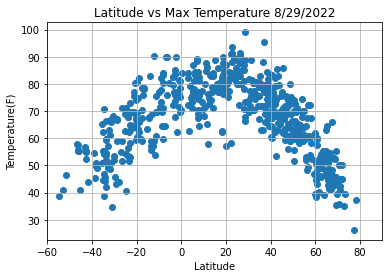

In [139]:
plt.scatter(df2['Lat'], df2['Max Temp'])
plt.title('Latitude vs Max Temperature 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()
plt.xlim(-60,90)
plt.savefig('output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

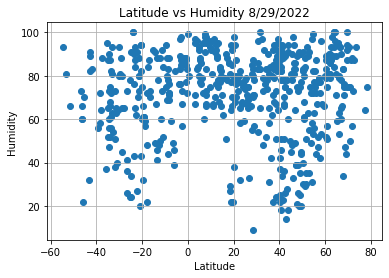

In [140]:
plt.scatter(df2['Lat'], df2['Humidity'])
plt.title('Latitude vs Humidity 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

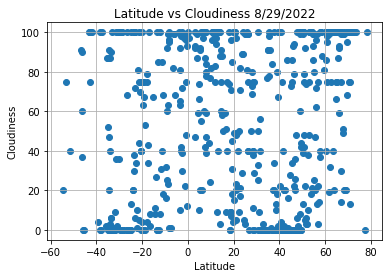

In [141]:
plt.scatter(df2['Lat'], df2['Cloudiness'])
plt.title('Latitude vs Cloudiness 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('output_data/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

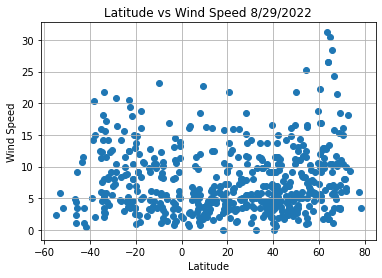

In [142]:
plt.scatter(df2['Lat'], df2['Wind Speed'])
plt.title('Latitude vs Wind Speed 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('output_data/Fig4.png')
plt.show()

## Linear Regression

In [143]:
df2.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,75.36,88,75,10.36,TO,1661830666
1,xuanhua,40.6103,115.0447,75.65,46,0,5.39,CN,1661830666
2,plainview,40.7765,-73.4673,76.96,82,100,11.50,US,1661830667
3,kapaa,22.0752,-159.3190,82.72,73,40,12.66,US,1661830667
4,busselton,-33.6500,115.3333,59.38,56,6,2.71,AU,1661830667


In [144]:
northern_hemi=df2.loc[df2['Lat']>0,:]
northern_hemi.head(3)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,xuanhua,40.6103,115.0447,75.65,46,0,5.39,CN,1661830666
2,plainview,40.7765,-73.4673,76.96,82,100,11.50,US,1661830667
3,kapaa,22.0752,-159.3190,82.72,73,40,12.66,US,1661830667


In [145]:
southern_hemi=df2.loc[df2['Lat']<0,:]
southern_hemi.head(3)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,75.36,88,75,10.36,TO,1661830666
4,busselton,-33.6500,115.3333,59.38,56,6,2.71,AU,1661830667
5,port alfred,-33.5906,26.8910,54.46,61,90,15.61,ZA,1661830668


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [146]:
northern_hemi.head(3)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,xuanhua,40.6103,115.0447,75.65,46,0,5.39,CN,1661830666
2,plainview,40.7765,-73.4673,76.96,82,100,11.50,US,1661830667
3,kapaa,22.0752,-159.3190,82.72,73,40,12.66,US,1661830667


The r-value is -0.7611906520542945.


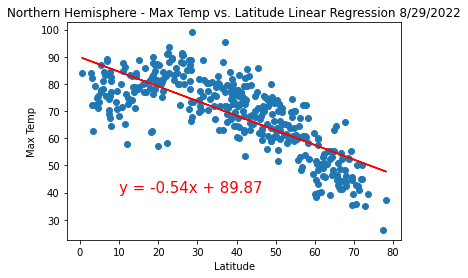

In [147]:
plt.scatter(northern_hemi['Lat'], northern_hemi['Max Temp'])
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(f'The r-value is {rvalue}.')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/LatVsMaxTempNorth.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.7314547510526781.


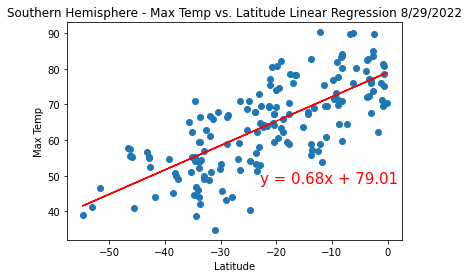

In [148]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,48),fontsize=15,color="red")
print(f'The r-value is:{rvalue}.')
plt.scatter(southern_hemi['Lat'], southern_hemi['Max Temp'])
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/LatVsMaxTempSouth.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.07922190847376391.


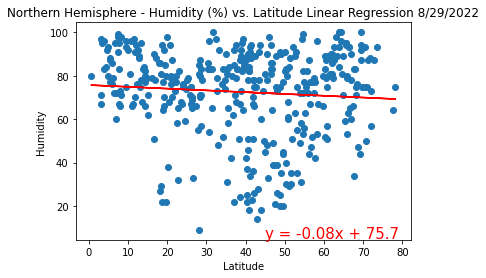

In [149]:
plt.scatter(northern_hemi['Lat'], northern_hemi['Humidity'])
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
print(f'The r-value is {rvalue}.')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('output_data/LatVsHumidityNorth.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.16831112343001212.


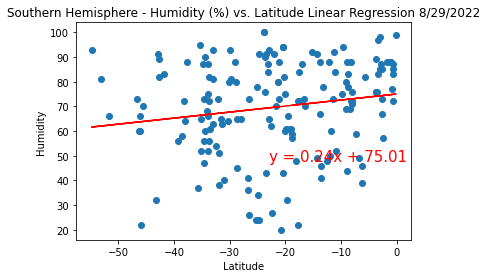

In [150]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,48),fontsize=15,color="red")
print(f'The r-value is:{rvalue}.')
plt.scatter(southern_hemi['Lat'], southern_hemi['Humidity'])
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('output_data/LatVsHumiditySouth.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.058631473137197465.


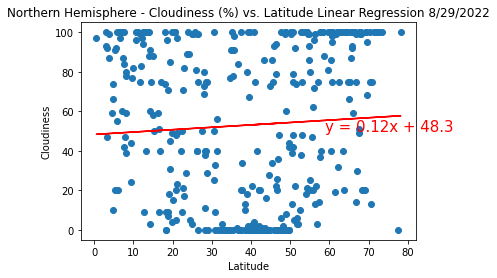

In [151]:
plt.scatter(northern_hemi['Lat'], northern_hemi['Cloudiness'])
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(59,50),fontsize=15,color="red")
print(f'The r-value is {rvalue}.')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('output_data/LatVsCloudinessNorth.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.16136554640211015.


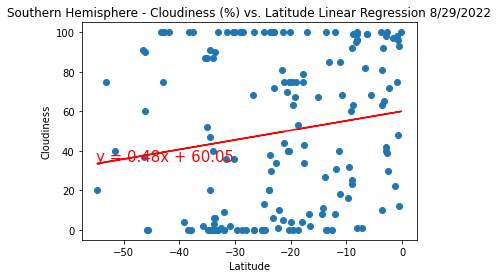

In [152]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
print(f'The r-value is:{rvalue}.')
plt.scatter(southern_hemi['Lat'], southern_hemi['Cloudiness'])
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('output_data/LatVsCloudinessSouth.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.23202296905206118.


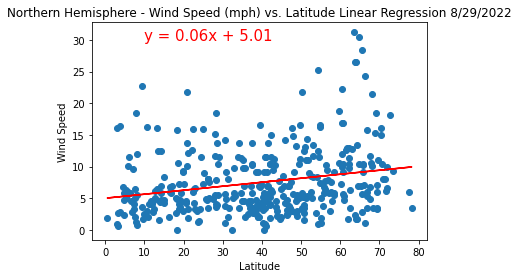

In [153]:
plt.scatter(northern_hemi['Lat'], northern_hemi['Wind Speed'])
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
print(f'The r-value is {rvalue}.')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('output_data/LatVsWindSpeedNorth.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.04188936897578671.


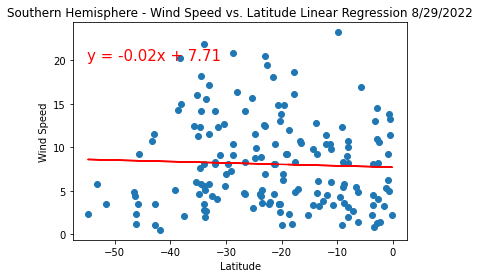

In [154]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f'The r-value is:{rvalue}.')
plt.scatter(southern_hemi['Lat'], southern_hemi['Wind Speed'])
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression 8/29/2022')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('output_data/LatVsWindSpeedSouth.png')
plt.show()